In [2]:
import pydicom as dm
import numpy as np
import pylab
import numpy as np
import matplotlib.pyplot as plt
import glob
import json

In [5]:
batch_size = [8,16,32,64,128]
elaps = [5279.386791229248, 2820.7826261520386, 1714.9139382839203, 1143.0413265228271, 656.1915442943573]
#elaps = [2411.9438288211823,1473.8833060264587,991.1994619369507,798.6776838302612,731.0150253772736]

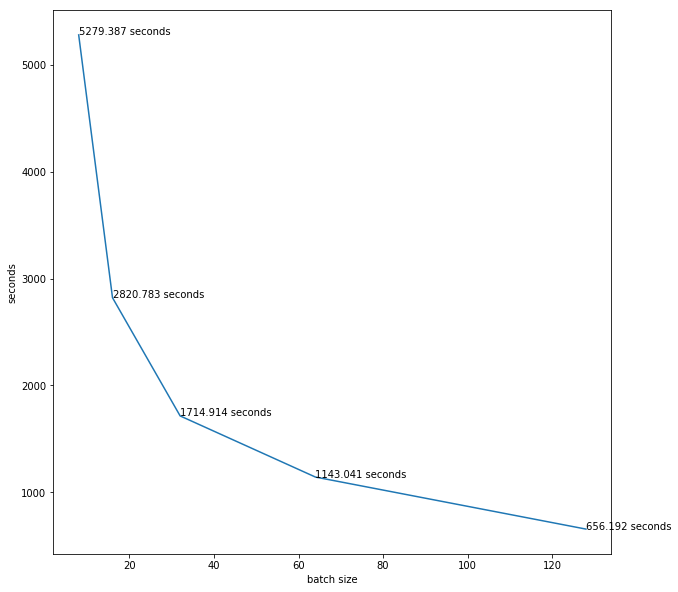

In [6]:
fig = plt.figure(figsize=(10,10))
plt.plot(batch_size,elaps)
ax = plt.gca()
ax.set_xlabel("batch size")
ax.set_ylabel("seconds")

for i in range(len(elaps)):    
    ax.annotate("{0} seconds".format(np.round(elaps[i], decimals=3)), xy=(batch_size[i], elaps[i]))

In [7]:
performance = glob.glob("/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_*performance.json")

In [6]:
#precisions = glob.glob("/masvol/heartsmart/unet_model/data/combined_1_2_256*b_performance.json")

In [9]:
ps = []

for p in reversed(sorted(performance)):
    print (p) 
    if 'reg' in p or 'dropout' in p:
        continue
        
    with open(p, 'r') as inputs:
        jin = json.load(inputs)
        ps.append(jin['precision'])
ps

/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_reg_32b_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_dropout_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_8b_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_64b_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_32b_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_16b_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_128b_performance.json


[0.9480030075926096, 0.9621261008853013, 0.9594497648519079, 0.0, 0.0]

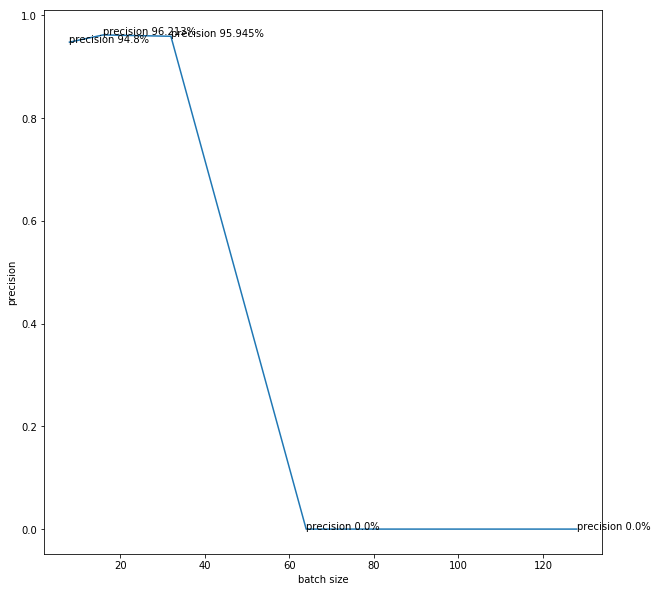

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot(batch_size,ps)
ax = plt.gca()
ax.set_xlabel("batch size")
ax.set_ylabel("precision")

for i in range(len(ps)):    
    ax.annotate("precision {0}%".format(np.round(ps[i]*100.0,decimals=3)), xy=(batch_size[i], ps[i]))

In [11]:
lrs = [2e-05, 4e-05, 8e-05, 0.00016, 0.00032]

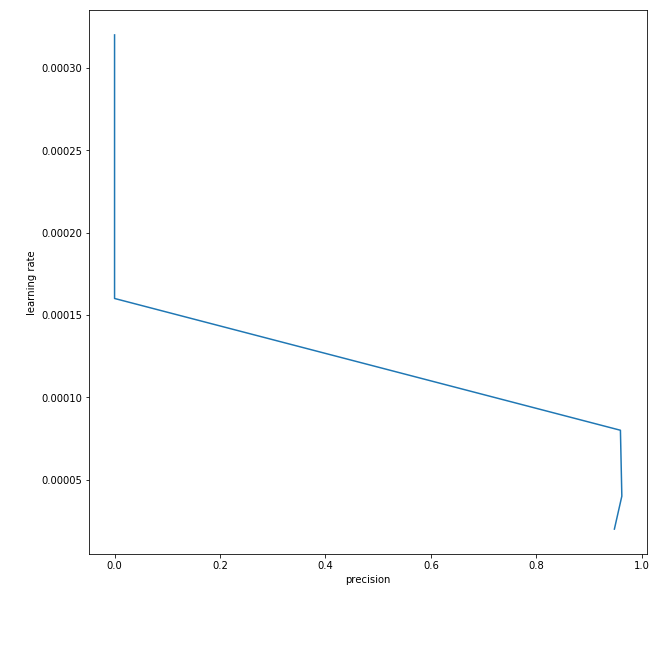

In [14]:
fig = plt.figure(figsize=(10,10))
plt.plot(ps,lrs)
ax = plt.gca()
ax.set_xlabel("precision")
ax.set_ylabel("learning rate")

for i in range(len(ps)):    
    ax.annotate("precision {0}%".format(np.round(ps[i]*100.0,decimals=3)), xy=(batch_size[i], ps[i]))

In [9]:
lrbs = [2186.5076847076416,1209.5094847679138,737.2953312397003,511.1315948963165,394.11369800567627]

In [10]:
precisionslr = glob.glob("/masvol/heartsmart/unet_model/data/combined_1_2_176*b_lr_performance.json")

In [11]:
pslr = []

for p in reversed(sorted(precisionslr)):
    print (p) 

    with open(p, 'r') as inputs:
        jin = json.load(inputs)
        pslr.append(jin['precision'])
pslr

/masvol/heartsmart/unet_model/data/combined_1_2_176_aug_8b_lr_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_aug_64b_lr_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_aug_32b_lr_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_aug_16b_lr_performance.json
/masvol/heartsmart/unet_model/data/combined_1_2_176_aug_128b_lr_performance.json


[0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(batch_size,ps)
ax = plt.gca()
ax.set_xlabel("batch size")
ax.set_ylabel("precision")

for i in range(len(ps)):    
    ax.annotate("precision {0}%".format(np.round(ps[i]*100.0,decimals=3)), xy=(batch_size[i], ps[i]))